# <center> EDA

In [1]:
import numpy   as np
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import unidecode

In [2]:
train = pd.read_csv("data/train.csv",            index_col="Id")
test  = pd.read_csv("data/test.csv",             index_col="Id")
sub   = pd.read_csv("data/sampleSubmission.csv", index_col="Id")
train.head()

,Marca,Modelo,Tiempo,Provincia,Localidad,Año,Kms,Cambio,Cv,Combust,Puertas,Vendedor,Precio
Id,,,,,,,,,,,,,
0,OPEL,VECTRA,33 días,la_rioja,Arnedo,2005.0,200000.0,manual,120.0,diesel,5.0,Profesional,2200
1,NISSAN,PRIMERA,43 horas,aragon,Teruel,2008.0,400000.0,manual,100.0,diesel,4.0,Particular,3500
2,RENAULT,CLIO BUSINESS DCI 75 ECO2,14 horas,sevilla,Camas,2014.0,53565.0,manual,75.0,diesel,5.0,Profesional,8200
3,MERCEDES-BENZ,CLASE CLS,1 hora,burgos,Burgos,2007.0,215000.0,automat,224.0,diesel,4.0,Particular,12500
4,RENAULT,CAPTUR LIFE ENERGY DCI 90 ECO2 EURO 6,45 días,caceres,Caceres,2016.0,119945.0,manual,90.0,diesel,5.0,Profesional,9900


# Fix (Data claning)

In [3]:
def cleanString(valor):
    return unidecode.unidecode(valor.upper().strip())

def clean(data):
    data['Marca']  = data['Marca'].apply(cleanString)
    data['Modelo'] = data['Modelo'].apply(cleanString)

    data['Marca'].replace("MERCEDES", "MERCEDES-BENZ",     inplace=True)
    data['Modelo'].replace("SERIE ", "SERIE_", regex=True, inplace=True)
    data['Modelo'].replace("CLASE ", "CLASE_", regex=True, inplace=True)
    data['Modelo'].replace("RANGE ROVER ", "", regex=True, inplace=True)
    
    return data

train = clean(train)
test  = clean(test)

In [4]:
train.head()

,Marca,Modelo,Tiempo,Provincia,Localidad,Año,Kms,Cambio,Cv,Combust,Puertas,Vendedor,Precio
Id,,,,,,,,,,,,,
0,OPEL,VECTRA,33 días,la_rioja,Arnedo,2005.0,200000.0,manual,120.0,diesel,5.0,Profesional,2200
1,NISSAN,PRIMERA,43 horas,aragon,Teruel,2008.0,400000.0,manual,100.0,diesel,4.0,Particular,3500
2,RENAULT,CLIO BUSINESS DCI 75 ECO2,14 horas,sevilla,Camas,2014.0,53565.0,manual,75.0,diesel,5.0,Profesional,8200
3,MERCEDES-BENZ,CLASE_CLS,1 hora,burgos,Burgos,2007.0,215000.0,automat,224.0,diesel,4.0,Particular,12500
4,RENAULT,CAPTUR LIFE ENERGY DCI 90 ECO2 EURO 6,45 días,caceres,Caceres,2016.0,119945.0,manual,90.0,diesel,5.0,Profesional,9900


# Feature engineering

In [5]:
train["Modelo_1st"] = train.Modelo.str.split().str.get(0)

In [6]:
modelosPadre = ["GOLF", "SERIE 3"]

def estaEnLosModelosPadre(nuevoModelo):
    
    for modeloPadre in modelosPadre:
        if modeloPadre in nuevoModelo:
            return True
    return False

estaEnLosModelosPadre("GOLF GTI")

True

In [7]:
modelos = train.Modelo.value_counts().index.tolist()
len(modelos)

46305

In [8]:
modelosPadre = []

#for m in modelos:
for m in modelos:  # Todos los modelos
    
    if not estaEnLosModelosPadre(m):
        modelosPadre.append(m)

len(modelosPadre)

599

In [9]:
modelosPadre

['GOLF',
 'SERIE_3',
 'LEON',
 'IBIZA',
 'MEGANE',
 'A4',
 'FOCUS',
 'ASTRA',
 'PASSAT',
 'A3',
 'CLIO',
 'MONDEO',
 'SERIE_5',
 'CORSA',
 'FIESTA',
 'CLASE_C',
 'POLO',
 'SCENIC',
 'A6',
 'ZAFIRA',
 'C4',
 'LAGUNA',
 'BERLINGO',
 '206',
 'CLASE_E',
 'SERIE_1',
 'TOLEDO',
 'VECTRA',
 '307',
 'C3',
 'KANGOO',
 'MINI',
 'C5',
 'XSARA',
 'CORDOBA',
 'TOURAN',
 '407',
 'A5',
 'PARTNER',
 'X5',
 '207',
 'INSIGNIA',
 'CLASE_A',
 '308',
 'PUNTO',
 'VITO',
 'QASHQAI',
 'SAXO',
 'TOUAREG',
 'X3',
 'ARONA',
 'CIVIC',
 'TRANSIT',
 '220',
 'TRANSPORTER',
 '320',
 'OCTAVIA',
 '406',
 'MONTERO',
 '500',
 'CROSSLAND X',
 'ALTEA',
 'CLASE_M',
 'TT',
 'AVENSIS',
 'C-MAX',
 'X1 SDRIVE18D',
 'KONA',
 'GRANDLAND X',
 '306',
 'C2',
 'ALMERA',
 'MICRA',
 'COROLLA',
 'STILO',
 'LAND CRUISER',
 '147',
 'STONIC',
 'SPORTAGE',
 'SCIROCCO',
 'MULTIVAN',
 'RIFTER',
 'ALHAMBRA',
 'PRIMERA',
 'VOYAGER',
 'FABIA',
 'CADDY',
 'RAV4',
 'CARNIVAL',
 'JUMPY',
 'TRAFIC',
 'FORTWO',
 'MERIVA',
 'YARIS',
 'VITARA',
 'X2',


In [10]:
def modeloPadre(Modelo):
    for modeloPadre in modelosPadre:
        if modeloPadre in Modelo:
            return modeloPadre

def tranform2type(Tiempo):
    if   Tiempo.endswith('días'):  return 'dias'
    elif Tiempo.endswith('horas'): return 'horas'
    elif Tiempo.endswith('hora'):  return 'hora'
    elif Tiempo.endswith('min'):   return 'min'
    elif Tiempo.endswith('seg'):   return 'seg'
    elif Tiempo.endswith('nuevo anuncio'):  return 'nuevo anuncio'
    elif Tiempo.endswith('destacado'):      return 'destacado'

    
def tranform2dias(Tiempo):
    if   Tiempo.endswith('días'):  return int(Tiempo.replace(' días', ''))
    elif Tiempo.endswith('horas'): return int(Tiempo.replace(' horas', ''))/24
    elif Tiempo.endswith('hora'):  return int(Tiempo.replace(' hora', ''))/24
    elif Tiempo.endswith('min'):   return int(Tiempo.replace(' min', ''))/(60*24)
    elif Tiempo.endswith('seg'):   return int(Tiempo.replace(' seg', ''))/(60*60*24)
    elif Tiempo.endswith('nuevo anuncio'):  return 0
    elif Tiempo.endswith('destacado'):      return -1

train["Modelo_padre"] = train["Modelo"].apply(modeloPadre) # Variable numerica
train["Tiempo_días"]  = train["Tiempo"].apply(tranform2dias) # Variable numerica
train["Tiempo_tipo"]  = train["Tiempo"].apply(tranform2type) # Variable categorica

# Missings

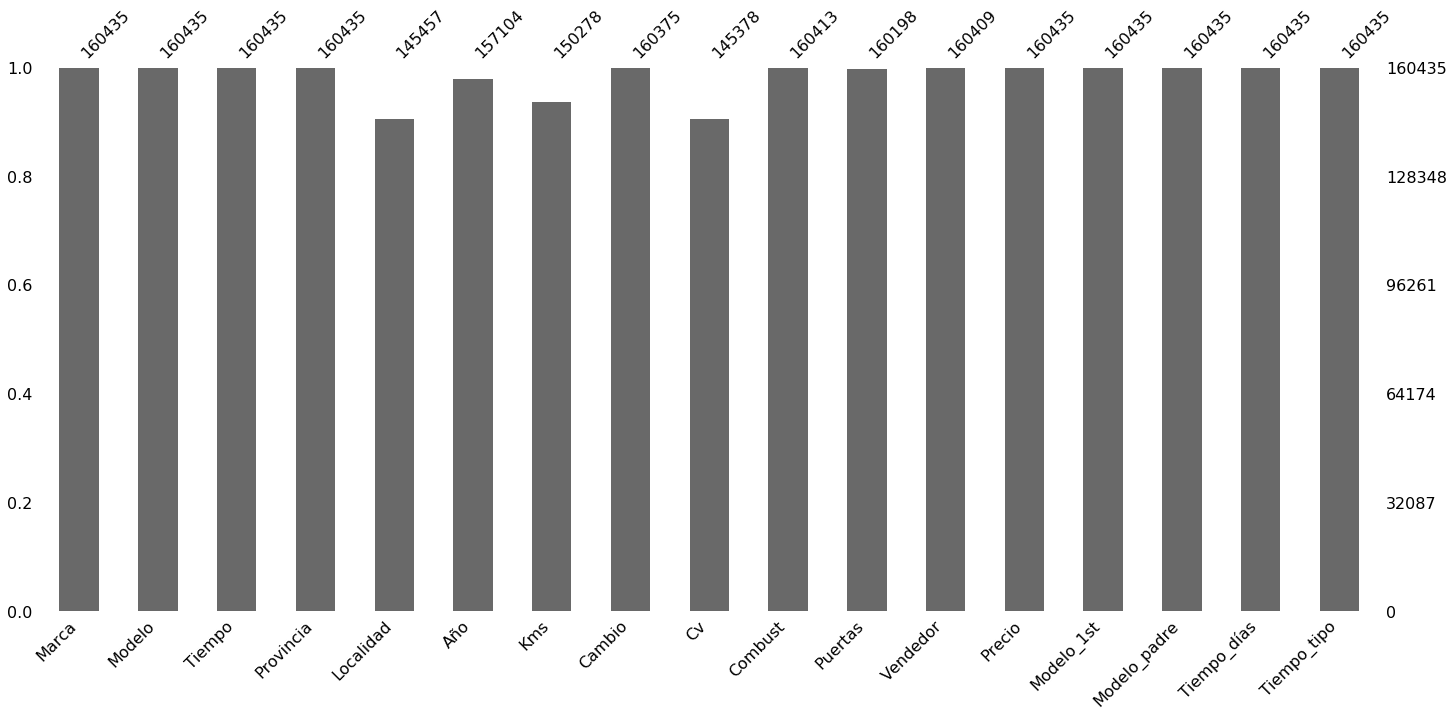

In [11]:
msno.bar(train);

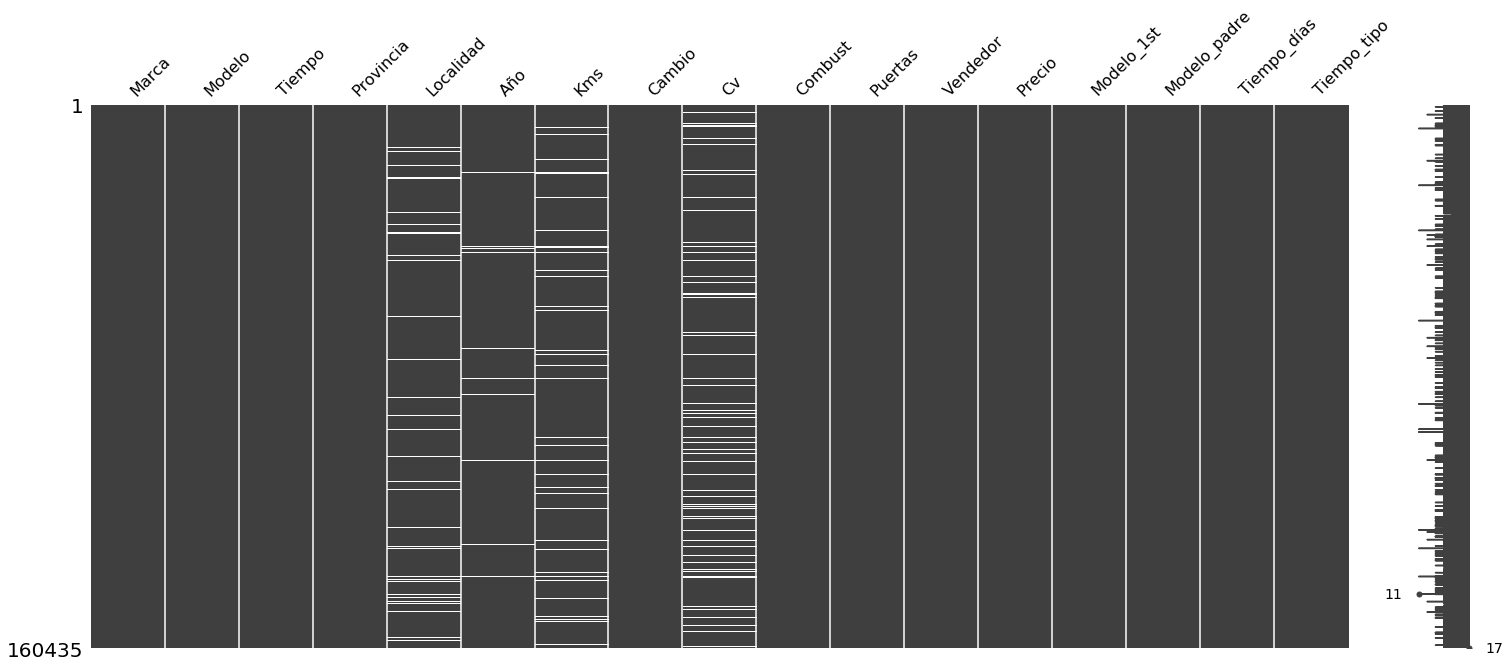

In [12]:
msno.matrix(train);

# Distributions

In [13]:
# Variables numéricas
def plot_num(variable, title="", min=False, max=False, zeros=True, points=True, opacity=.3, size=(16,4)):
    if not zeros:
        variable=variable[variable!=0]
        title += " (no zeros)"
    if min:
        variable = variable[variable >= min]
        title += " (min: "+str(min)+")"
    if max:
        variable = variable[variable <= max]
        title += " (max: "+str(max)+")"
    fig, ax = plt.subplots(figsize=size)
    ax.set_title(title, fontsize=20)
    ax2 = ax.twinx()
    sb.violinplot(variable, cut=0, palette="Set3", inner="box", ax=ax)
    if points:
        sb.scatterplot(variable, y=variable.index, color="grey", linewidth=0, s=20, alpha=opacity, ax=ax2).invert_yaxis()


def plot_num2(variable, title="", min=False, max=False, zeros=True, size=(16,4)):
    if not zeros:
        variable=variable[variable!=0]
        title += " (no zeros)"
    if min:
        variable = variable[variable >= min]
        title += " (min: "+str(min)+")"
    if max:
        variable = variable[variable <= max]
        title += " (max: "+str(max)+")"
    plt.figure(figsize=size)
    sb.violinplot(variable, cut=0, palette="Set3", inner="quart" )
    sb.stripplot(variable, color="grey", alpha=.5).set_title(title, fontsize=20);


# Variables ordinales
def plot_ord(variable, title="", min=False, max=False, zeros=True, size=(16,4)):
    if not zeros:
        variable=variable[variable!=0]
        title += " (no zeros)"
    if min:
        variable = variable[variable >= min]
        title += " (min: "+str(min)+")"
    if max:
        variable = variable[variable <= max]
        title += " (max: "+str(max)+")"
    plt.figure(figsize=size)
    sb.countplot(variable, color='royalblue').set_title(title, fontsize=20);


# Variables categoricas
def plot_cat(variable, title="", top=False, normalize=False, dropna=False, size=(16,4)):
    plt.figure(figsize=size)
    nuiques = str(variable.nunique())
    cats = variable.value_counts(normalize=normalize, dropna=dropna)
    if top:
        cats = cats[:top]
        title += " (top "+str(top)+" de "+nuiques+")"
    else:
        title += " ("+nuiques+")"
    sb.barplot(x=cats, y=cats.index).set_title(title, fontsize=20);

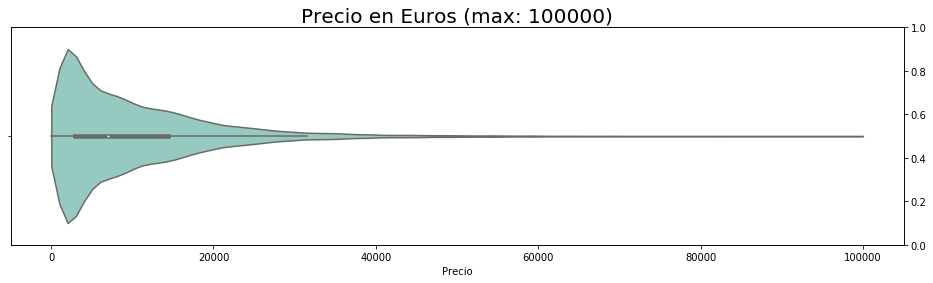

In [14]:
plot_num(train.Precio, title="Precio en Euros", max=100000, points=False)

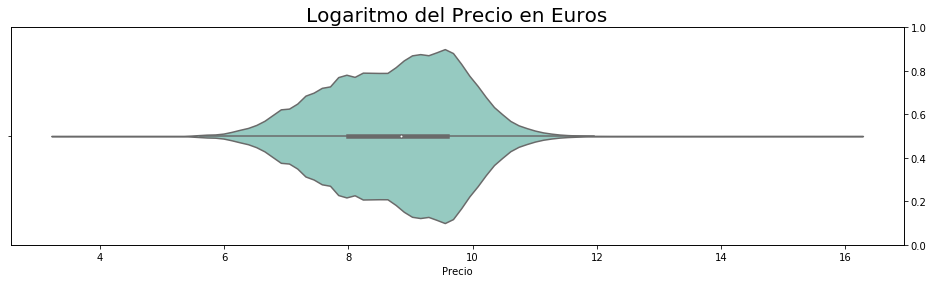

In [15]:
plot_num(np.log(train.Precio), title="Logaritmo del Precio en Euros", points=False)

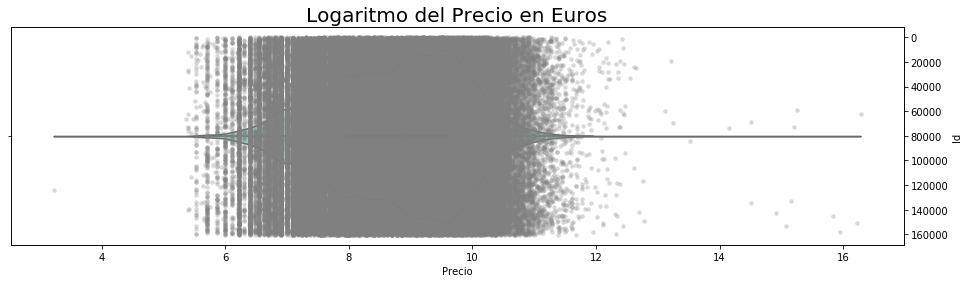

In [16]:
plot_num(np.log(train.Precio), title="Logaritmo del Precio en Euros", points=True)

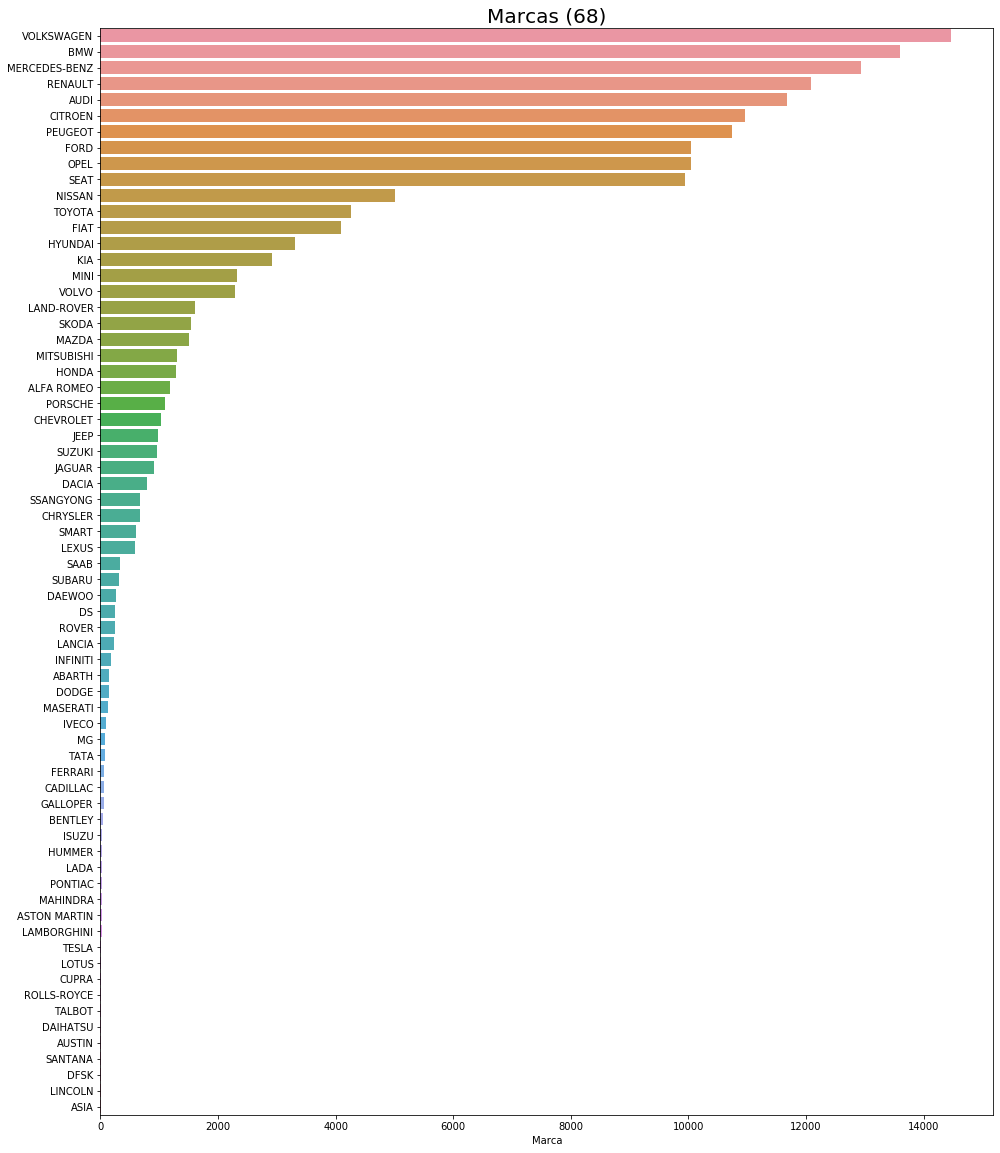

In [17]:
plot_cat(train.Marca, title="Marcas", size=(16,20))

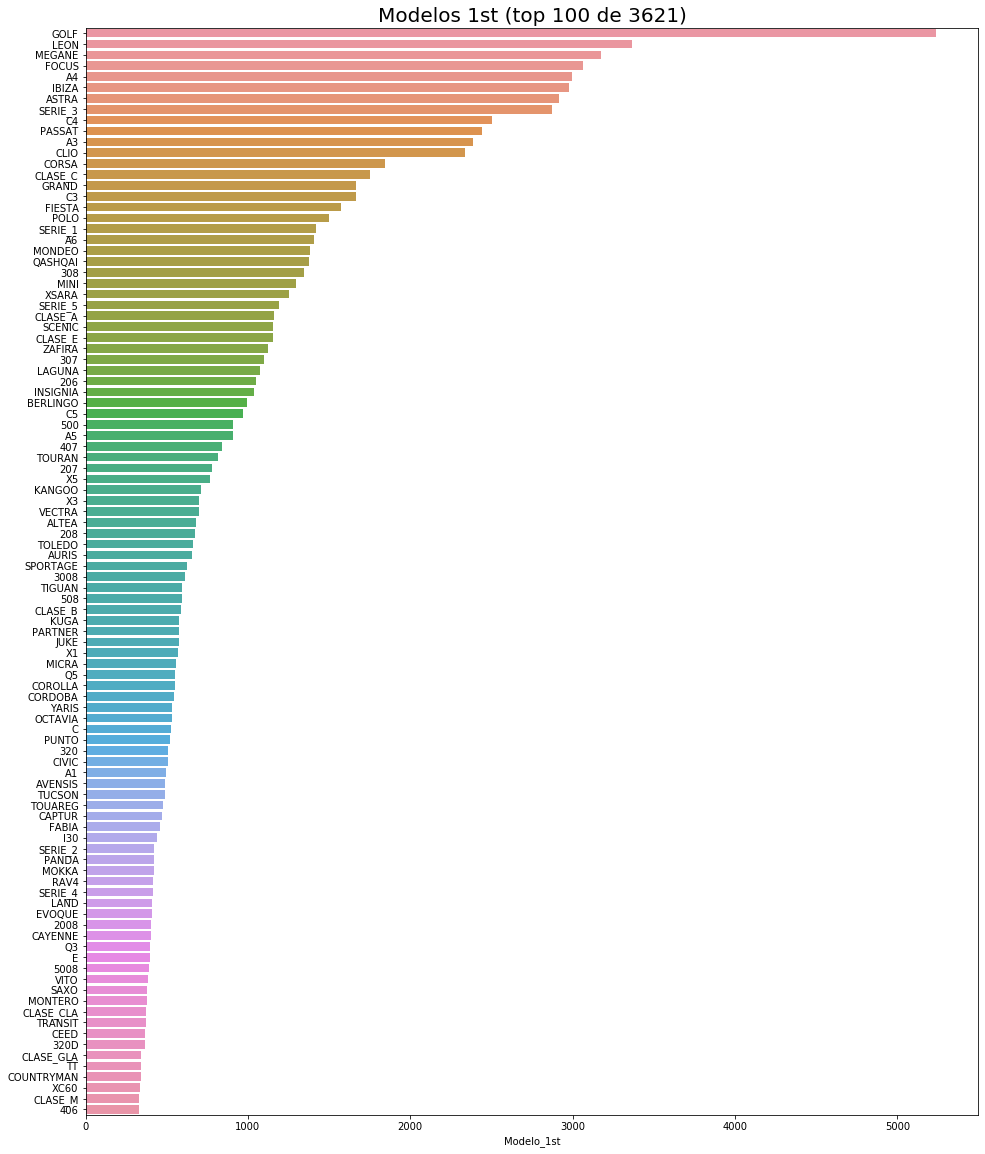

In [18]:
plot_cat(train.Modelo_1st, title="Modelos 1st", top=100, size=(16,20))

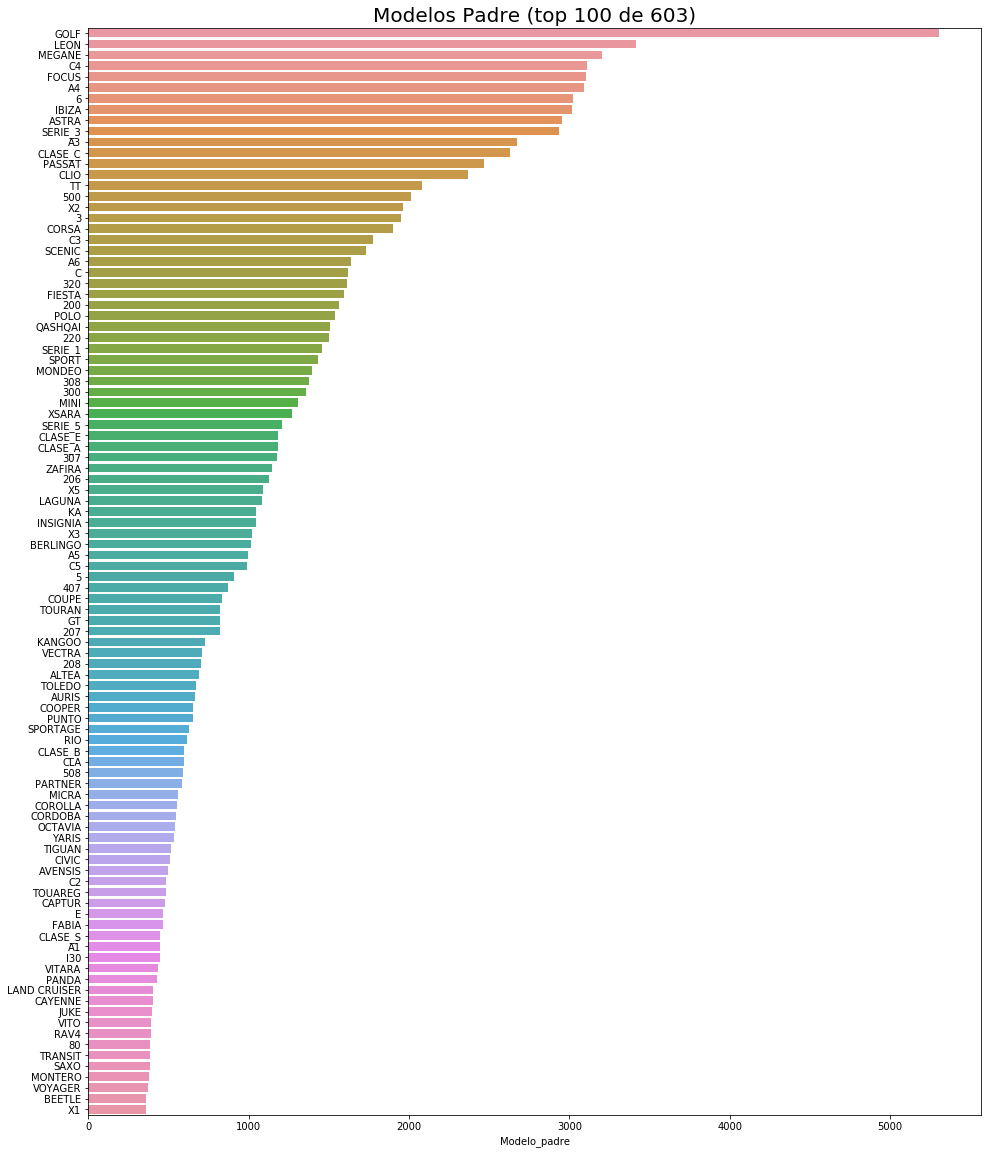

In [19]:
plot_cat(train.Modelo_padre, title="Modelos Padre", top=100, size=(16,20))

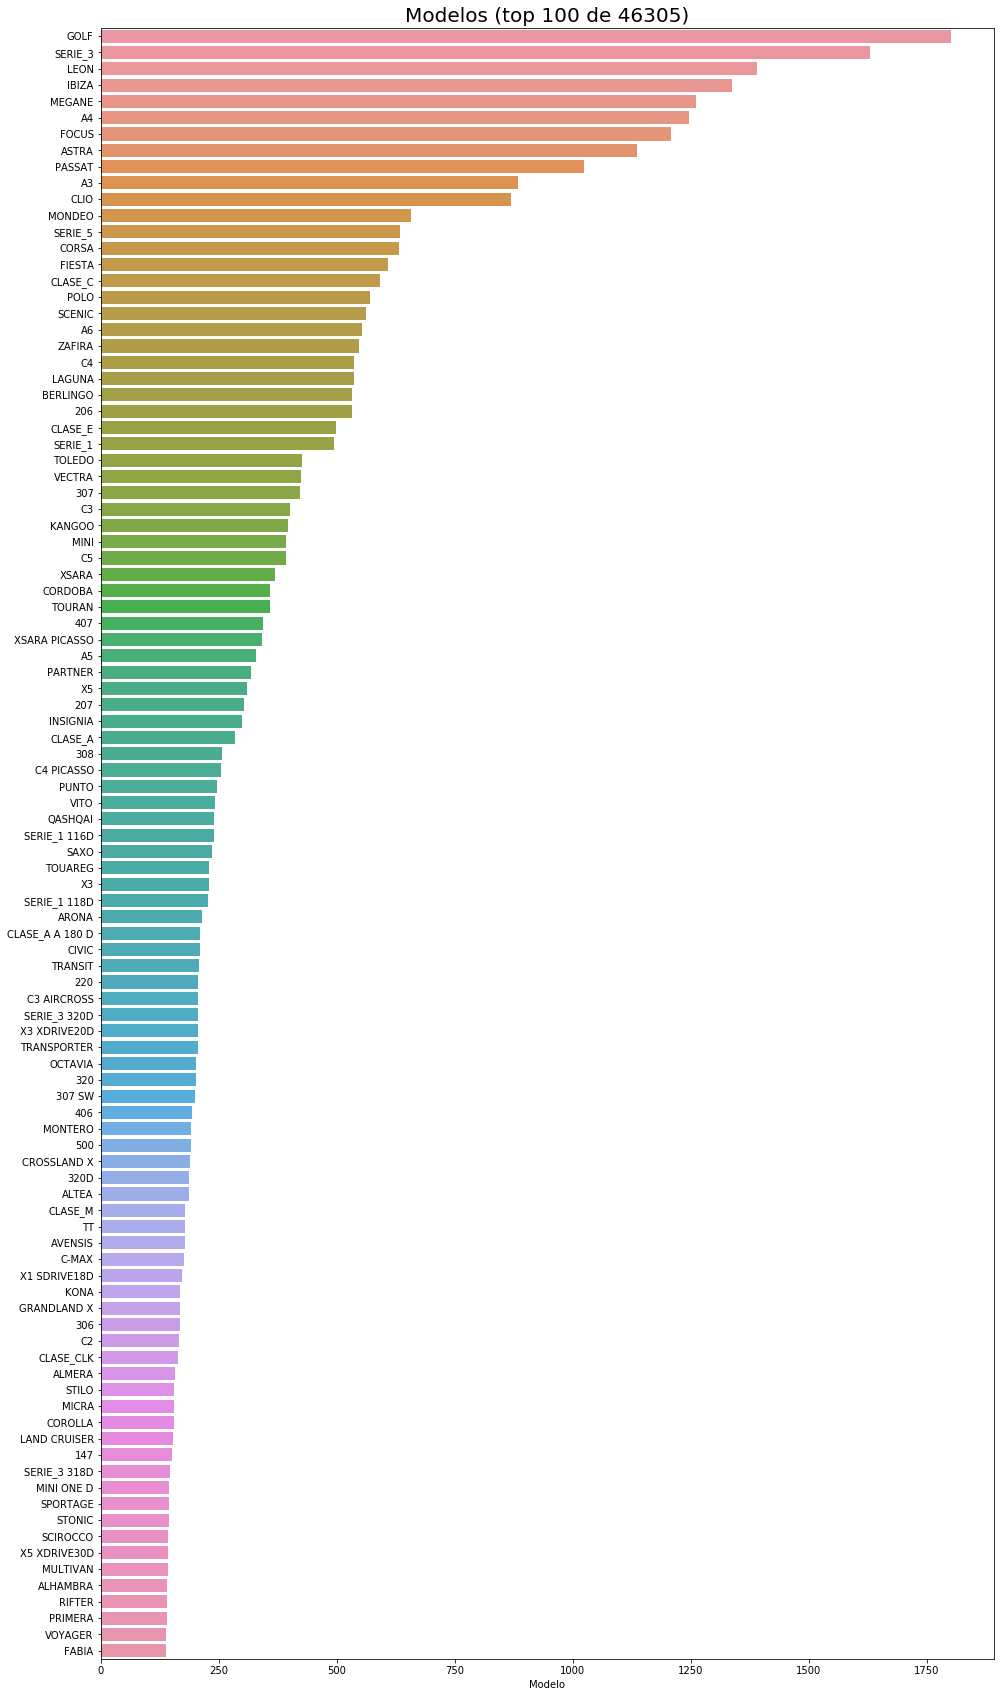

In [20]:
plot_cat(train.Modelo, title="Modelos", top=100, size=(16,30))

In [18]:
train.Marca.value_counts()

VOLKSWAGEN       14460
BMW              13604
MERCEDES-BENZ    12938
RENAULT          12083
AUDI             11668
                 ...  
AUSTIN              13
SANTANA             11
DFSK                11
LINCOLN              8
ASIA                 7
Name: Marca, Length: 68, dtype: int64

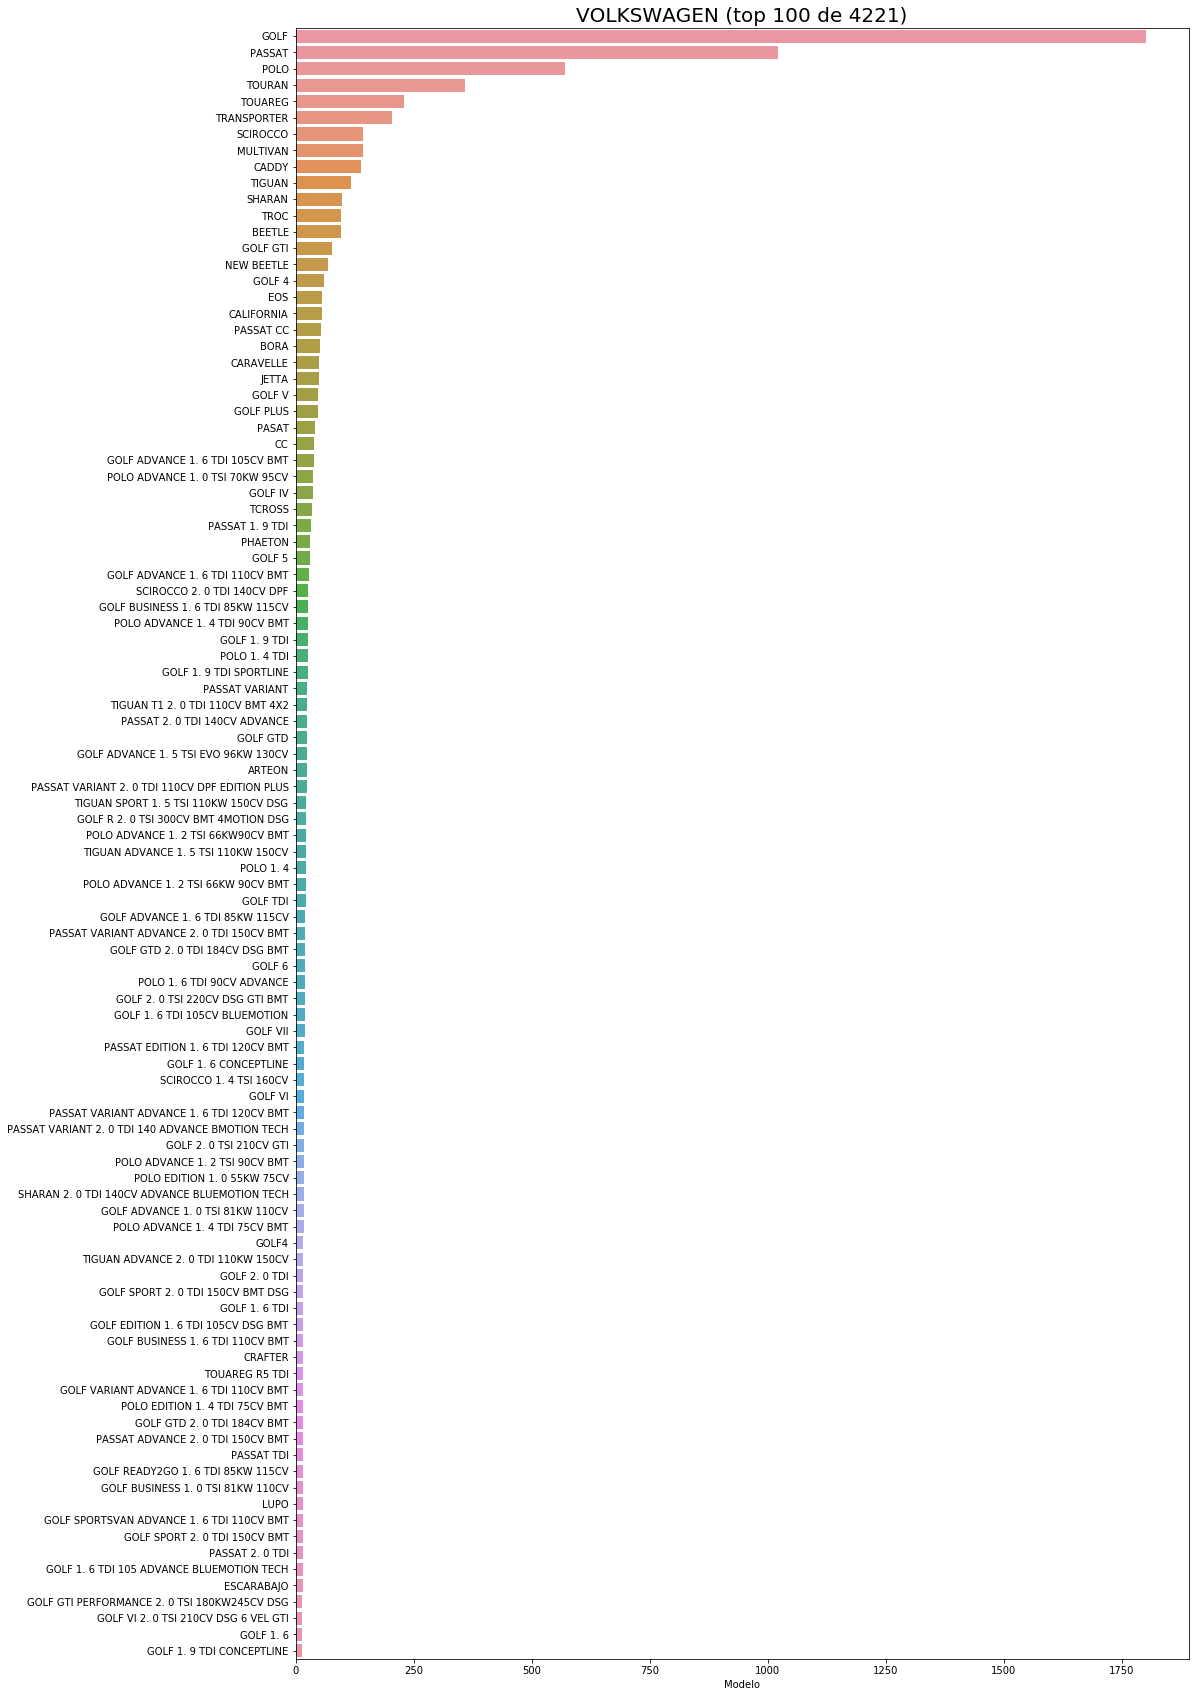

In [23]:
wv = train[train.Marca=="VOLKSWAGEN"]['Modelo']
plot_cat(wv, title="VOLKSWAGEN", top=100, size=(16,30))

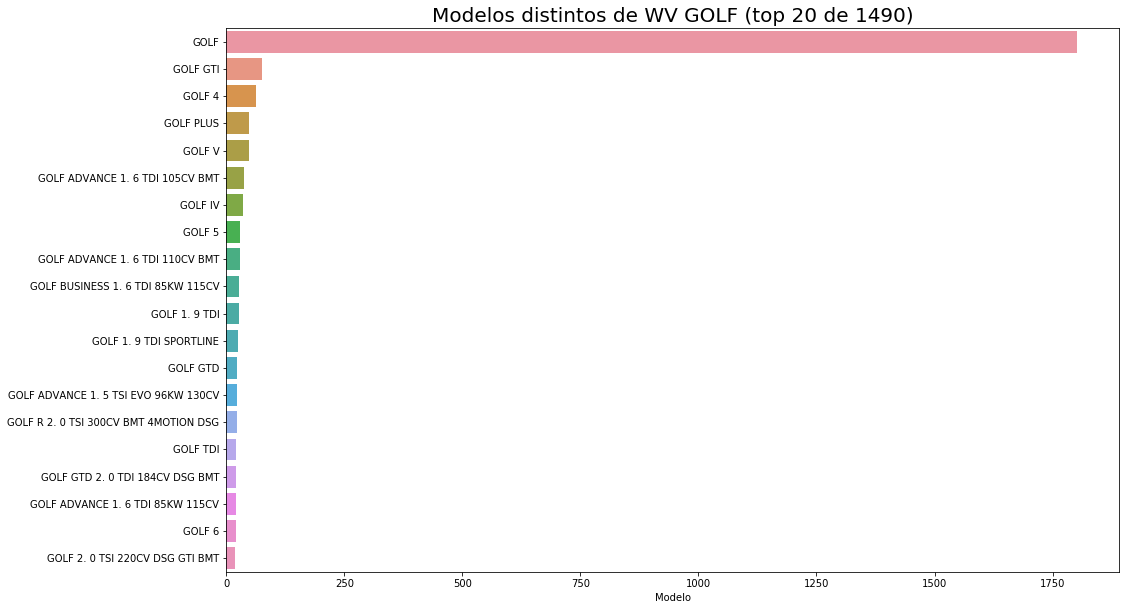

In [23]:
golfs = train[train.Modelo.str.contains("GOLF")]
plot_cat(golfs.Modelo, title="Modelos distintos de WV GOLF", top=20, size=(16,10))

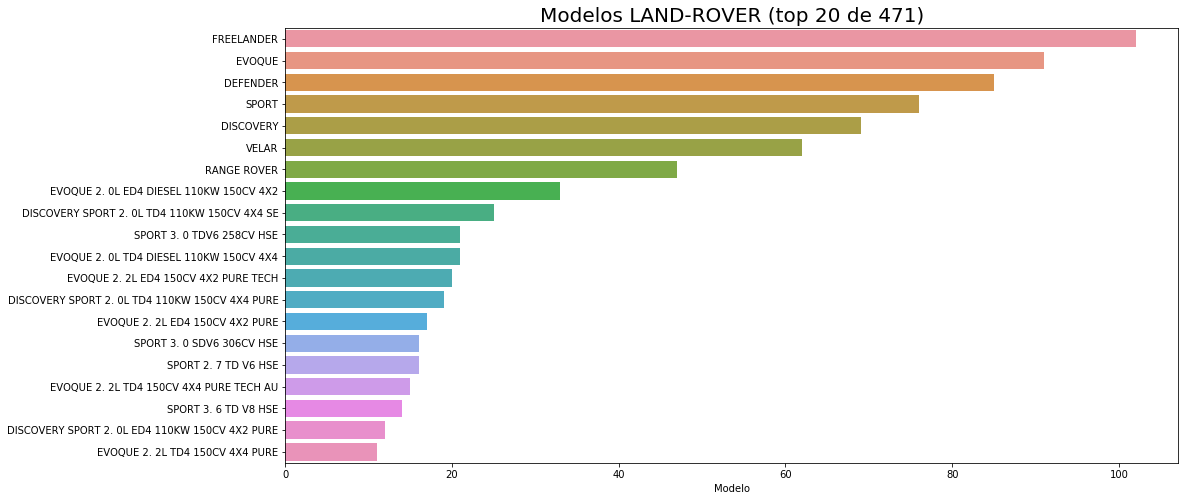

In [21]:
modelosRenault = train[train.Marca=="LAND-ROVER"]['Modelo']
plot_cat(modelosRenault, title="Modelos LAND-ROVER", top=20, size=(16,8))

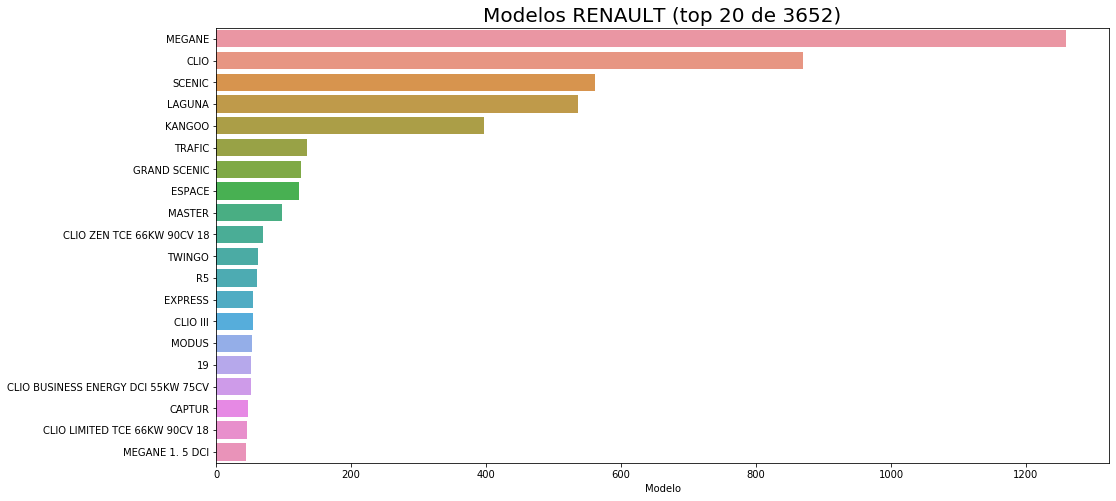

In [22]:
modelosRenault = train[train.Marca=="RENAULT"]['Modelo']
plot_cat(modelosRenault, title="Modelos RENAULT", top=20, size=(16,8))

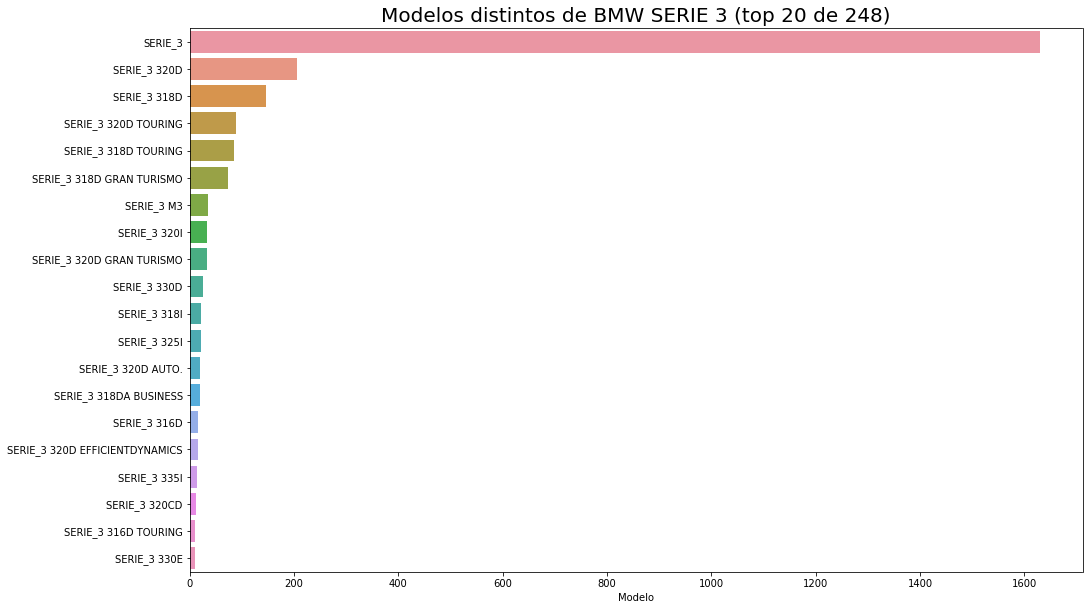

In [25]:
serie3 = train[train.Modelo.str.contains("SERIE_3")]
plot_cat(serie3.Modelo, title="Modelos distintos de BMW SERIE 3", top=20, size=(16,10))

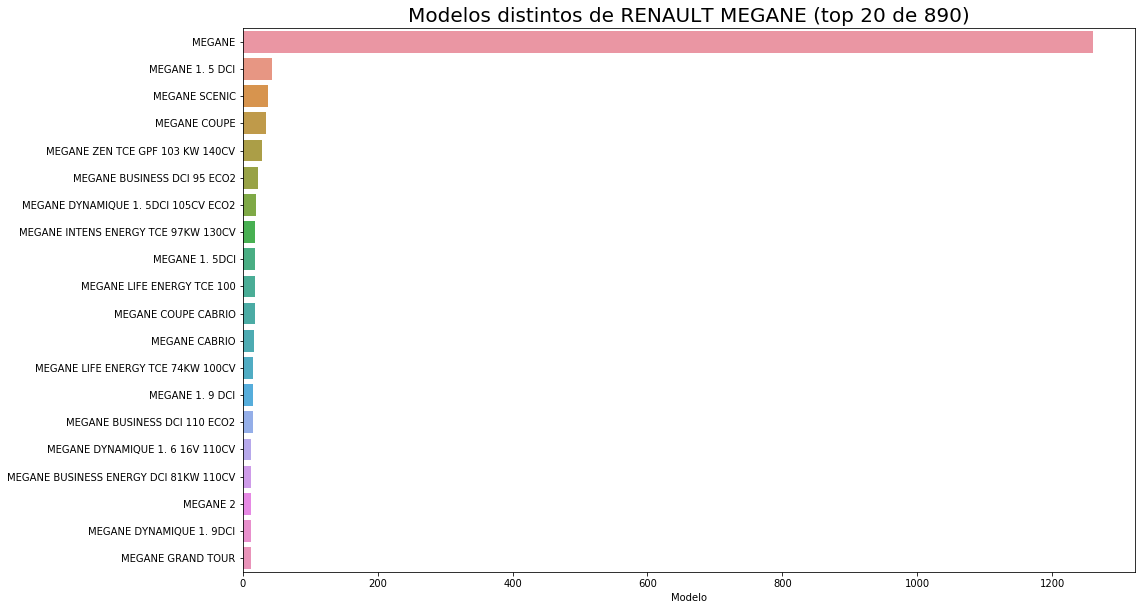

In [26]:
golfs = train[train.Modelo.str.contains("MEGANE")]
plot_cat(golfs.Modelo, title="Modelos distintos de RENAULT MEGANE", top=20, size=(16,10))

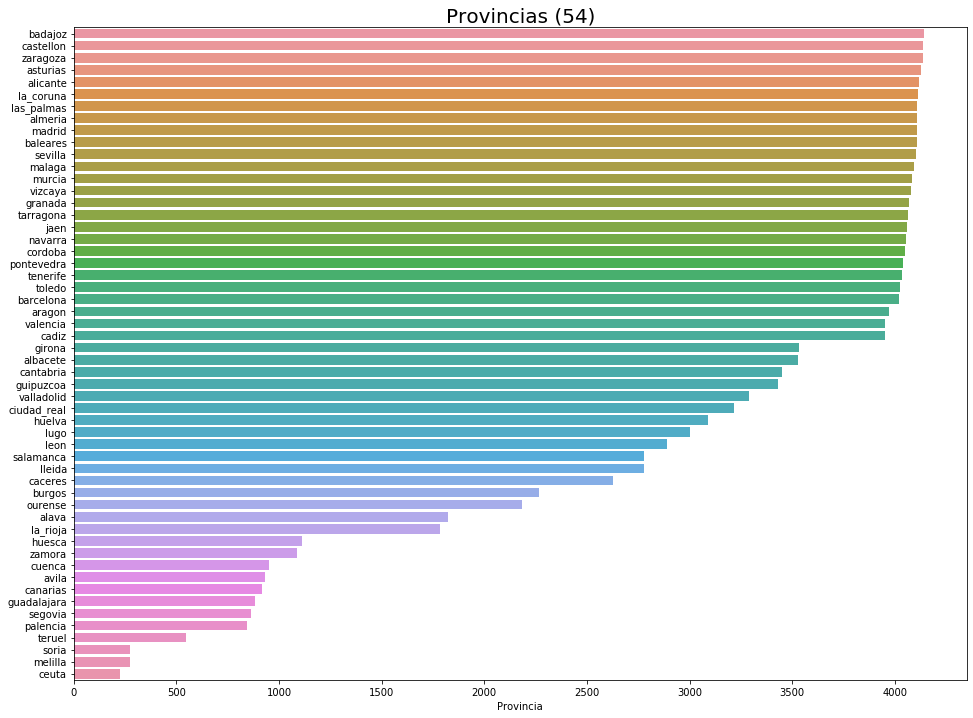

In [11]:
plot_cat(train.Provincia, title="Provincias", size=(16,12))

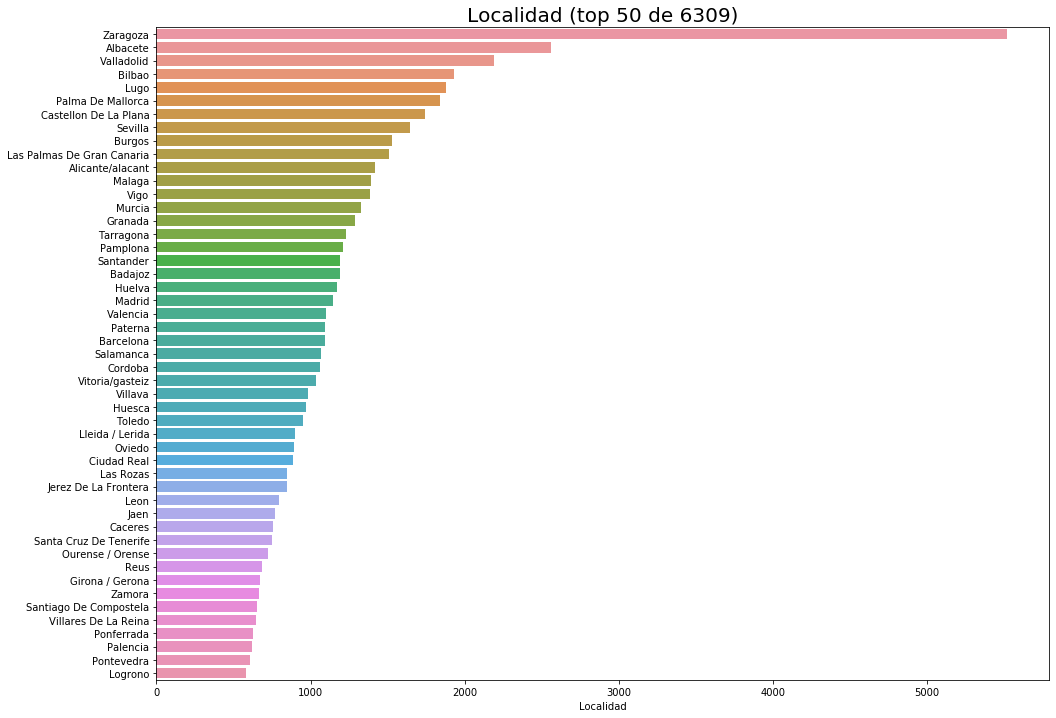

In [12]:
plot_cat(train.Localidad, title="Localidad", top=50, size=(16,12))

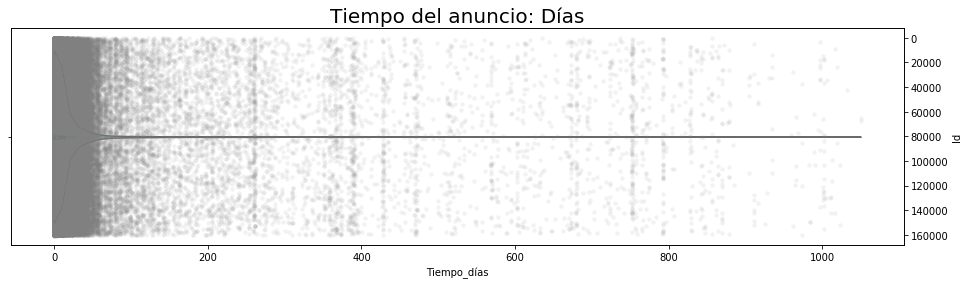

In [80]:
plot_num(train.Tiempo_días, title="Tiempo del anuncio: Días", opacity=.1)

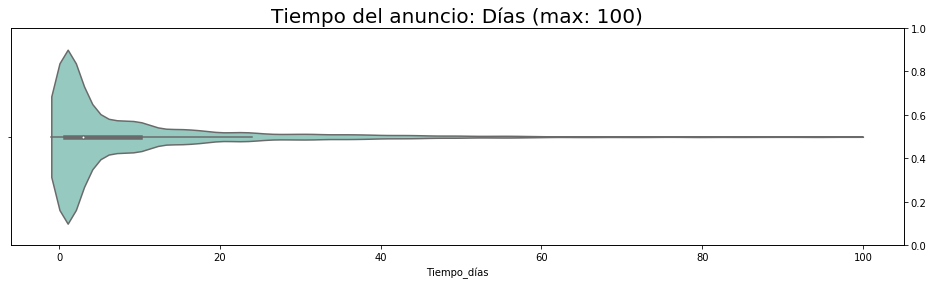

In [78]:
plot_num(train.Tiempo_días, title="Tiempo del anuncio: Días", max=100, points=False)

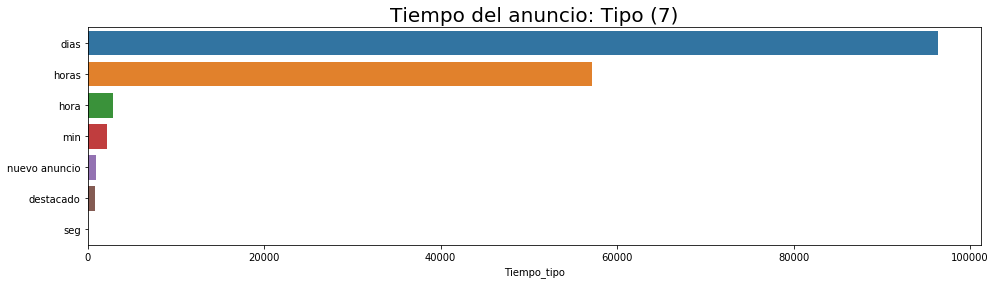

In [79]:
plot_cat(train.Tiempo_tipo, title="Tiempo del anuncio: Tipo")

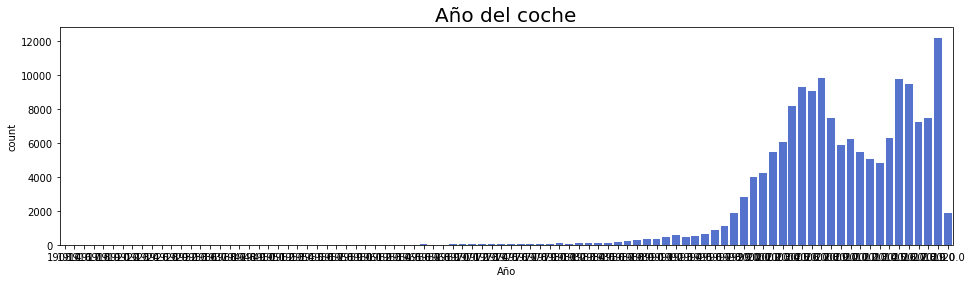

In [76]:
plot_ord(train.Año, title="Año del coche")

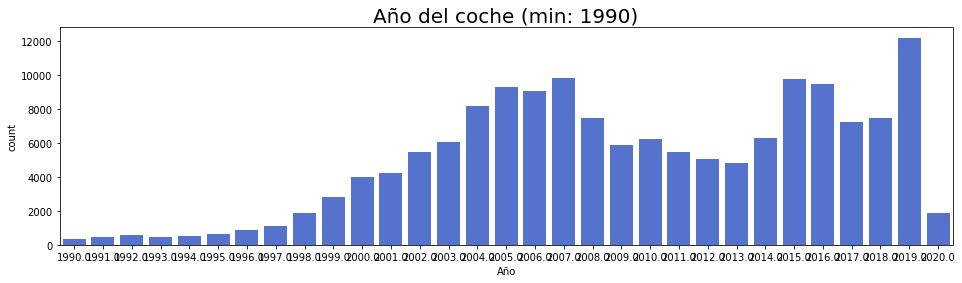

In [77]:
plot_ord(train.Año, title="Año del coche", min=1990)

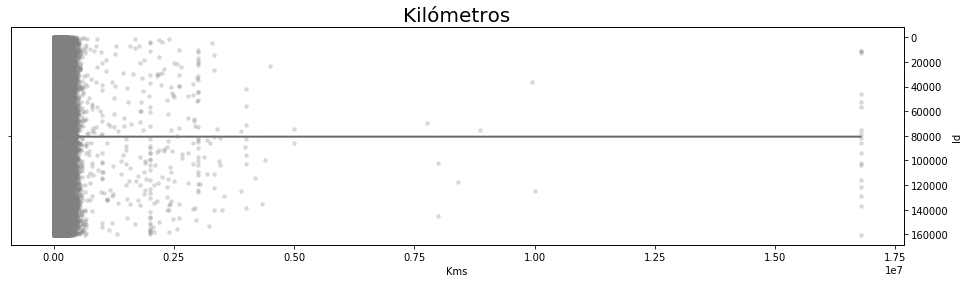

In [23]:
plot_num(train.Kms, title="Kilómetros")

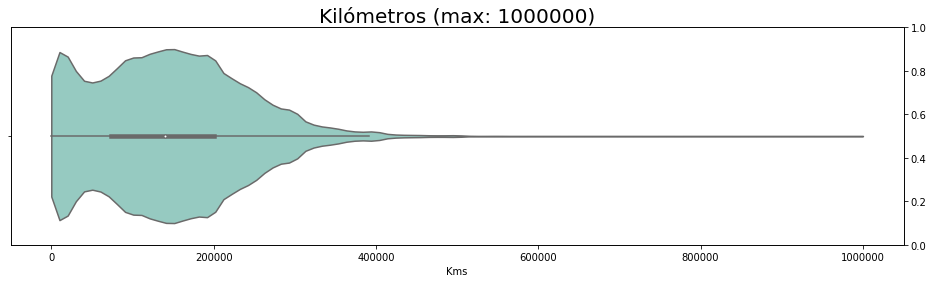

In [22]:
plot_num(train.Kms, max=1000000, title="Kilómetros", points=False)

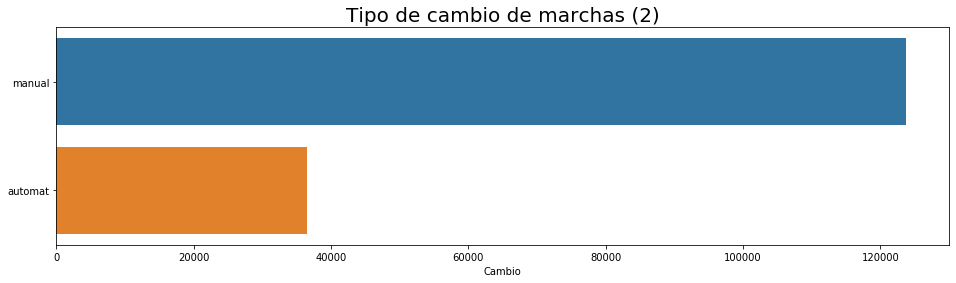

In [21]:
plot_cat(train.Cambio, title="Tipo de cambio de marchas")

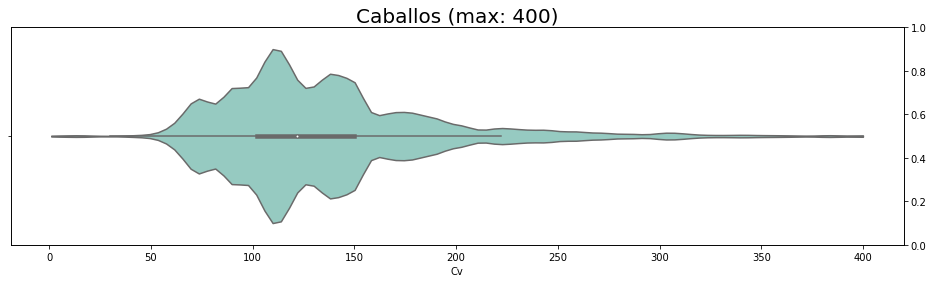

In [39]:
plot_num(train.Cv, max=400, title="Caballos", points=False)

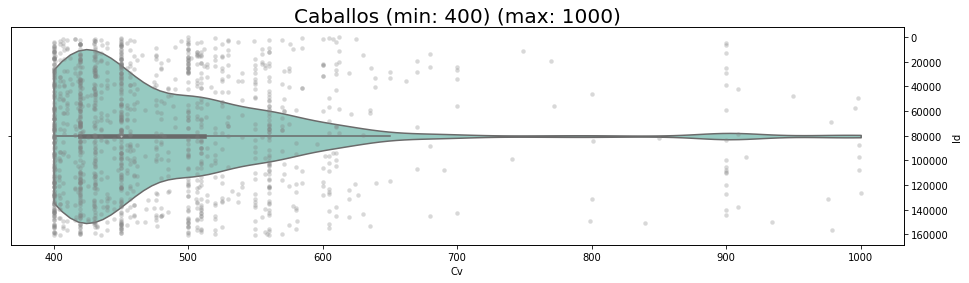

In [37]:
plot_num(train.Cv, min=400, max=1000, title="Caballos", points=True)

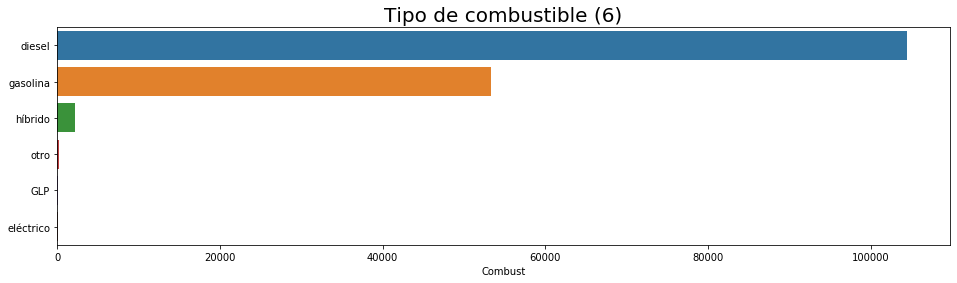

In [41]:
plot_cat(train.Combust, title="Tipo de combustible")

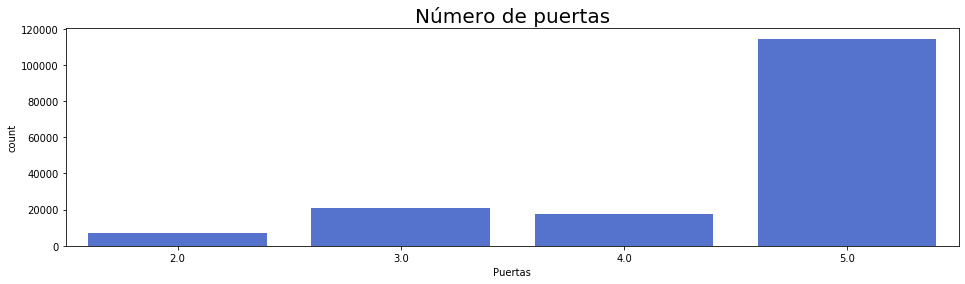

In [44]:
plot_ord(train.Puertas, title="Número de puertas")

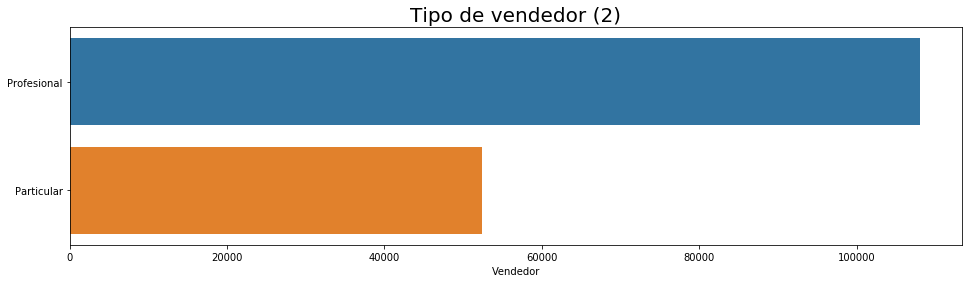

In [45]:
plot_cat(train.Vendedor, title="Tipo de vendedor")